In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-4/Data-dictionary.xlsx
/kaggle/input/data-storm-4/DataStorm4.0_KaggleProblemStatement.pdf
/kaggle/input/data-storm-4/Store-info.csv
/kaggle/input/data-storm-4/Testing-data.csv
/kaggle/input/data-storm-4/Historical-transaction-data.csv


In [109]:
transaction_data = pd.read_csv("/kaggle/input/data-storm-4/Historical-transaction-data.csv",parse_dates=['transaction_date']).dropna()
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432109 entries, 0 to 473824
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   item_description  432109 non-null  object             
 1   transaction_date  432109 non-null  datetime64[ns, UTC]
 2   invoice_id        432109 non-null  float64            
 3   customer_id       432109 non-null  object             
 4   shop_id           432109 non-null  object             
 5   item_price        432109 non-null  int64              
 6   quantity_sold     432109 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 26.4+ MB


In [110]:
transaction_data=transaction_data.sort_values("transaction_date")
transaction_data

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
298887,CREAM SODA 1.5L,2021-10-15 00:00:00+00:00,1046655.0,ROEK,SHOP104,220,2
273218,BOTTLED DRINKING WATER 500ML,2021-10-15 00:00:00+00:00,268177.0,P20R,SHOP063,35,1
454787,SODA 500ML,2021-10-15 00:00:00+00:00,1334707.0,EJMJ,SHOP036,280,4
190530,GINGER BEER 1.5L,2021-10-15 00:00:00+00:00,294800.0,J5IU,SHOP028,220,0
454788,SODA 500ML,2021-10-15 00:00:00+00:00,1334778.0,1MXO,SHOP036,70,2
...,...,...,...,...,...,...,...
113542,CREAM SODA 1.5L,2021-12-15 00:00:00+00:00,2313191.0,5O5Z,SHOP050,220,2
373704,BOTTLED DRINKING WATER 500ML,2021-12-15 00:00:00+00:00,2110281.0,I5SE,SHOP002,70,3
113541,GINGER BEER 1.5L,2021-12-15 00:00:00+00:00,2313191.0,5O5Z,SHOP050,220,1
423033,CREAM SODA 500ML,2021-12-15 00:00:00+00:00,2540921.0,PSFH,SHOP018,100,1


In [111]:
last_date = transaction_data["transaction_date"].max()
transaction_data["date_factor"] = np.log((last_date-transaction_data["transaction_date"])/np.timedelta64(1, 'D')+2)
transaction_data

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,date_factor
298887,CREAM SODA 1.5L,2021-10-15 00:00:00+00:00,1046655.0,ROEK,SHOP104,220,2,4.143135
273218,BOTTLED DRINKING WATER 500ML,2021-10-15 00:00:00+00:00,268177.0,P20R,SHOP063,35,1,4.143135
454787,SODA 500ML,2021-10-15 00:00:00+00:00,1334707.0,EJMJ,SHOP036,280,4,4.143135
190530,GINGER BEER 1.5L,2021-10-15 00:00:00+00:00,294800.0,J5IU,SHOP028,220,0,4.143135
454788,SODA 500ML,2021-10-15 00:00:00+00:00,1334778.0,1MXO,SHOP036,70,2,4.143135
...,...,...,...,...,...,...,...,...
113542,CREAM SODA 1.5L,2021-12-15 00:00:00+00:00,2313191.0,5O5Z,SHOP050,220,2,0.693147
373704,BOTTLED DRINKING WATER 500ML,2021-12-15 00:00:00+00:00,2110281.0,I5SE,SHOP002,70,3,0.693147
113541,GINGER BEER 1.5L,2021-12-15 00:00:00+00:00,2313191.0,5O5Z,SHOP050,220,1,0.693147
423033,CREAM SODA 500ML,2021-12-15 00:00:00+00:00,2540921.0,PSFH,SHOP018,100,1,0.693147


In [112]:
last_date

Timestamp('2021-12-15 00:00:00+0000', tz='UTC')

In [113]:
transaction_data["income"] = transaction_data["item_price"]*transaction_data["quantity_sold"]
transaction_data["rated_income"] = transaction_data["income"]/transaction_data["date_factor"]
transaction_data

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,date_factor,income,rated_income
298887,CREAM SODA 1.5L,2021-10-15 00:00:00+00:00,1046655.0,ROEK,SHOP104,220,2,4.143135,440,106.199781
273218,BOTTLED DRINKING WATER 500ML,2021-10-15 00:00:00+00:00,268177.0,P20R,SHOP063,35,1,4.143135,35,8.447710
454787,SODA 500ML,2021-10-15 00:00:00+00:00,1334707.0,EJMJ,SHOP036,280,4,4.143135,1120,270.326715
190530,GINGER BEER 1.5L,2021-10-15 00:00:00+00:00,294800.0,J5IU,SHOP028,220,0,4.143135,0,0.000000
454788,SODA 500ML,2021-10-15 00:00:00+00:00,1334778.0,1MXO,SHOP036,70,2,4.143135,140,33.790839
...,...,...,...,...,...,...,...,...,...,...
113542,CREAM SODA 1.5L,2021-12-15 00:00:00+00:00,2313191.0,5O5Z,SHOP050,220,2,0.693147,440,634.785818
373704,BOTTLED DRINKING WATER 500ML,2021-12-15 00:00:00+00:00,2110281.0,I5SE,SHOP002,70,3,0.693147,210,302.965959
113541,GINGER BEER 1.5L,2021-12-15 00:00:00+00:00,2313191.0,5O5Z,SHOP050,220,1,0.693147,220,317.392909
423033,CREAM SODA 500ML,2021-12-15 00:00:00+00:00,2540921.0,PSFH,SHOP018,100,1,0.693147,100,144.269504


In [114]:
shop = transaction_data.loc[(transaction_data.shop_id == "SHOP001")]
shop

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,date_factor,income,rated_income
361607,LEMONADE 500ML,2021-10-15 00:00:00+00:00,2056087.0,PZRC,SHOP001,100,1,4.143135,100,24.136314
112257,SODA PET 1.5L,2021-10-15 00:00:00+00:00,2056062.0,Z9N7,SHOP001,320,2,4.143135,640,154.472409
15052,ORANGE BARLEY 1.5L,2021-10-15 00:00:00+00:00,1065328.0,0SM2,SHOP001,440,2,4.143135,880,212.399562
121278,FIT O MANGO 1L,2021-10-15 00:00:00+00:00,1065297.0,3Y0K,SHOP001,290,2,4.143135,580,139.990620
91589,CREAM SODA 1.5L,2021-10-15 00:00:00+00:00,3031545.0,8H6Z,SHOP001,220,1,4.143135,220,53.099890
...,...,...,...,...,...,...,...,...,...,...
186063,CREAM SODA APPLE POP 1L,2021-12-15 00:00:00+00:00,3035931.0,KHS2,SHOP001,150,1,0.693147,150,216.404256
385413,GINGER BEER 1.5L,2021-12-15 00:00:00+00:00,2062925.0,XRZK,SHOP001,440,2,0.693147,880,1269.571636
385414,STRAWBERRY MILK 180ML,2021-12-15 00:00:00+00:00,2062925.0,XRZK,SHOP001,140,2,0.693147,280,403.954611
277969,FIT O MIXED FRUIT 200ML,2021-12-15 00:00:00+00:00,2062887.0,ZBY4,SHOP001,420,7,0.693147,2940,4241.523420


<AxesSubplot:xlabel='transaction_date'>

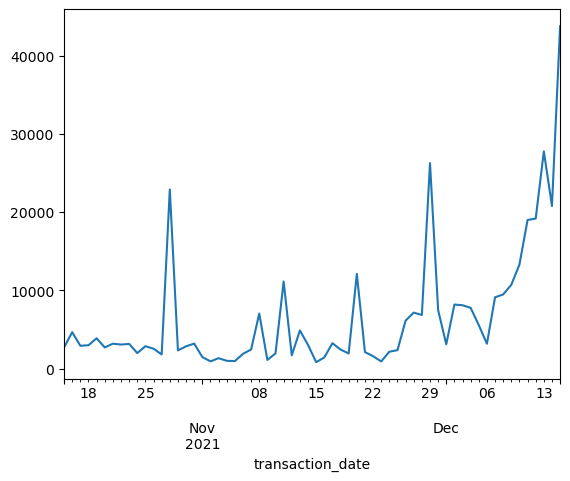

In [115]:
daily_shop = shop.groupby("transaction_date")["rated_income"].sum()
daily_shop.plot()

In [116]:
end_date = daily_shop
end_date

transaction_date
2021-10-15 00:00:00+00:00     2729.817094
2021-10-16 00:00:00+00:00     4661.830269
2021-10-17 00:00:00+00:00     2922.736235
2021-10-18 00:00:00+00:00     2995.595464
2021-10-19 00:00:00+00:00     3884.697619
                                 ...     
2021-12-11 00:00:00+00:00    18992.504622
2021-12-12 00:00:00+00:00    19177.502755
2021-12-13 00:00:00+00:00    27757.452587
2021-12-14 00:00:00+00:00    20780.761544
2021-12-15 00:00:00+00:00    43749.727115
Name: rated_income, Length: 62, dtype: float64

In [117]:
store_info = pd.read_csv("/kaggle/input/data-storm-4/Store-info.csv")
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   shop_id          124 non-null    object
 1   shop_area_sq_ft  124 non-null    int64 
 2   shop_profile     100 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [118]:
testing_data = pd.read_csv("/kaggle/input/data-storm-4/Testing-data.csv")
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   shop_id       24 non-null     object 
 1   shop_profile  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


In [119]:
data_copy = transaction_data.copy()
data_copy["income"] = data_copy["item_price"]*data_copy["quantity_sold"]

In [120]:
summary = transaction_data.groupby('shop_id',as_index =False)[["income","quantity_sold","rated_income"]].sum()
summary

,shop_id,income,quantity_sold,rated_income
0,SHOP001,1026885,3395,4.049021e+05
1,SHOP002,2739605,8484,1.019732e+06
2,SHOP003,1755510,6324,6.588296e+05
3,SHOP004,1489415,5940,5.881066e+05
4,SHOP005,1668260,6426,5.807383e+05
...,...,...,...,...
119,SHOP123,859940,3287,3.209836e+05
120,SHOP124,2638685,7914,1.025659e+06
121,SHOP125,1019570,3530,4.046966e+05
122,SHOP126,1695075,5730,5.864569e+05


In [121]:
stores_in_order = store_info.sort_values(by="shop_id").copy().reset_index()
stores_in_order

,index,shop_id,shop_area_sq_ft,shop_profile
0,87,SHOP001,580,Low
1,117,SHOP002,637,NaN
2,62,SHOP003,810,High
3,98,SHOP004,516,Low
4,11,SHOP005,617,Low
...,...,...,...,...
119,9,SHOP123,735,Moderate
120,95,SHOP124,606,High
121,49,SHOP125,1028,High
122,72,SHOP126,328,Moderate


In [128]:
stores_in_order = stores_in_order.merge(summary)


In [129]:
stores_in_order['factor'] = stores_in_order["rated_income"]/np.log10(stores_in_order["shop_area_sq_ft"])
stores_in_order

,index,shop_id,shop_area_sq_ft,shop_profile,income,quantity_sold,rated_income,factor
0,87,SHOP001,580,Low,1026885,3395,4.049021e+05,146521.661604
1,117,SHOP002,637,NaN,2739605,8484,1.019732e+06,363652.221013
2,62,SHOP003,810,High,1755510,6324,6.588296e+05,226519.838129
3,98,SHOP004,516,Low,1489415,5940,5.881066e+05,216801.525013
4,11,SHOP005,617,Low,1668260,6426,5.807383e+05,208128.663193
...,...,...,...,...,...,...,...,...
119,9,SHOP123,735,Moderate,859940,3287,3.209836e+05,111985.854383
120,95,SHOP124,606,High,2638685,7914,1.025659e+06,368614.313885
121,49,SHOP125,1028,High,1019570,3530,4.046966e+05,134361.735788
122,72,SHOP126,328,Moderate,1695075,5730,5.864569e+05,233102.668149


shop_profile
High        AxesSubplot(0.125,0.11;0.775x0.77)
Low         AxesSubplot(0.125,0.11;0.775x0.77)
Moderate    AxesSubplot(0.125,0.11;0.775x0.77)
Name: rated_income, dtype: object

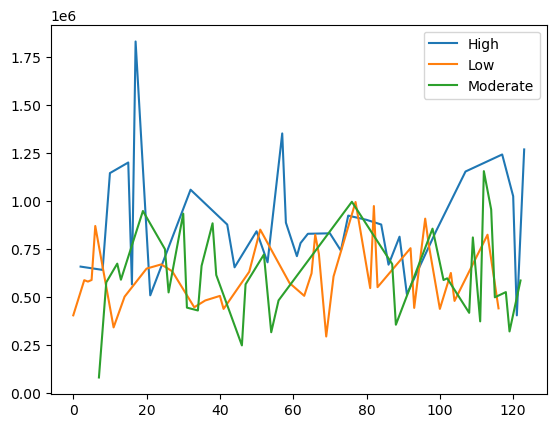

In [130]:
stores_in_order.groupby('shop_profile')['rated_income'].plot(legend=True)

In [136]:
stores_in_order.groupby('shop_profile')['rated_income'].mean()

shop_profile
High        885768.728250
Low         613853.719626
Moderate    611173.250631
Name: rated_income, dtype: float64

In [135]:
stores_in_order.groupby('shop_profile')['rated_income'].std()

shop_profile
High        295638.018740
Low         176239.008539
Moderate    240583.137874
Name: rated_income, dtype: float64

shop_profile
High        AxesSubplot(0.125,0.11;0.775x0.77)
Low         AxesSubplot(0.125,0.11;0.775x0.77)
Moderate    AxesSubplot(0.125,0.11;0.775x0.77)
Name: factor, dtype: object

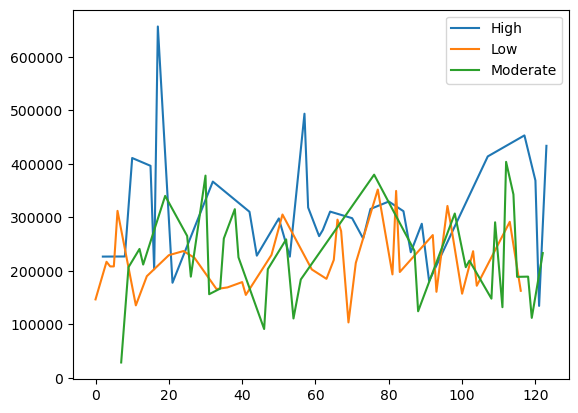

In [131]:
stores_in_order.groupby('shop_profile')['factor'].plot(legend=True)

In [137]:
stores_in_order.groupby('shop_profile')['factor'].mean()

shop_profile
High        313199.838307
Low         220830.363030
Moderate    222554.267460
Name: factor, dtype: float64

In [140]:
stores_in_order.groupby('shop_profile')['factor'].std()

shop_profile
High        106626.998274
Low          62190.472390
Moderate     88705.262653
Name: factor, dtype: float64

In [145]:
a = (313199.838307*88705.262653+222554.267460*106626.998274)/(88705.262653+106626.998274)

In [146]:
b = (222554.267460*62190.472390+220830.363030*88705.262653)/(62190.472390+88705.262653)

In [147]:
for ind in testing_data.index:
    for shop in stores_in_order.index:
        if testing_data['shop_id'][ind]==stores_in_order['shop_id'][shop]:
            fact = stores_in_order['factor'][shop]
            if fact < b:
                testing_data['shop_profile'][ind] = 'Low'
            elif fact < a:
                testing_data['shop_profile'][ind] = 'Moderate'
            else :
                testing_data['shop_profile'][ind] = 'High'

testing_data

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,High
3,SHOP097,High
4,SHOP044,Low
5,SHOP030,High
6,SHOP038,Low
7,SHOP029,Moderate
8,SHOP096,High
9,SHOP092,Low


In [149]:
testing_data.to_csv("day02.csv", index=False)